# Combined Visual Analysis of Both Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
billboard = pd.read_csv('billboard_top_100.csv')
spotify = pd.read_csv('spotify_top_songs.csv')
combined = spotify.merge(billboard, on = 'song', how = 'left', suffixes = ('_spotify', '_billboard'))

In [3]:
print(combined.head())

  artist_spotify                             song  duration_sec  explicit  \
0            OPM  Heaven Is a Halfpipe (If I Die)           257      True   
1       Mystikal                     Shake Ya Ass           257      True   
2       Mystikal                     Shake Ya Ass           257      True   
3       Mystikal                     Shake Ya Ass           257      True   
4       Mystikal                     Shake Ya Ass           257      True   

   year  popularity  danceability  energy  key  loudness  ...  liveness  \
0  2000          56         0.743   0.894    8    -6.886  ...    0.3670   
1  2000          57         0.914   0.607    7    -5.658  ...    0.0515   
2  2000          57         0.914   0.607    7    -5.658  ...    0.0515   
3  2000          57         0.914   0.607    7    -5.658  ...    0.0515   
4  2000          57         0.914   0.607    7    -5.658  ...    0.0515   

   valence   tempo        genre        date  rank  artist_billboard last-week  \
0    

In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38408 entries, 0 to 38407
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_spotify    38408 non-null  object 
 1   song              38408 non-null  object 
 2   duration_sec      38408 non-null  int64  
 3   explicit          38408 non-null  bool   
 4   year              38408 non-null  int64  
 5   popularity        38408 non-null  int64  
 6   danceability      38408 non-null  float64
 7   energy            38408 non-null  float64
 8   key               38408 non-null  int64  
 9   loudness          38408 non-null  float64
 10  mode              38408 non-null  int64  
 11  speechiness       38408 non-null  float64
 12  acousticness      38408 non-null  float64
 13  instrumentalness  38408 non-null  float64
 14  liveness          38408 non-null  float64
 15  valence           38408 non-null  float64
 16  tempo             38408 non-null  float6

## How Many Songs Are There?:

In [5]:
df_1 = combined[['artist_spotify', 'song', 'rank']]
df_2 = df_1.groupby(['artist_spotify', 'song'])['rank'].min().sort_values().reset_index()
df_3 = df_2.groupby('rank')['song'].nunique().reset_index()
print(df_3)

    rank  song
0    1.0   176
1    2.0    70
2    3.0    68
3    4.0    58
4    5.0    50
..   ...   ...
88  94.0     1
89  95.0     1
90  96.0     2
91  97.0     1
92  99.0     1

[93 rows x 2 columns]


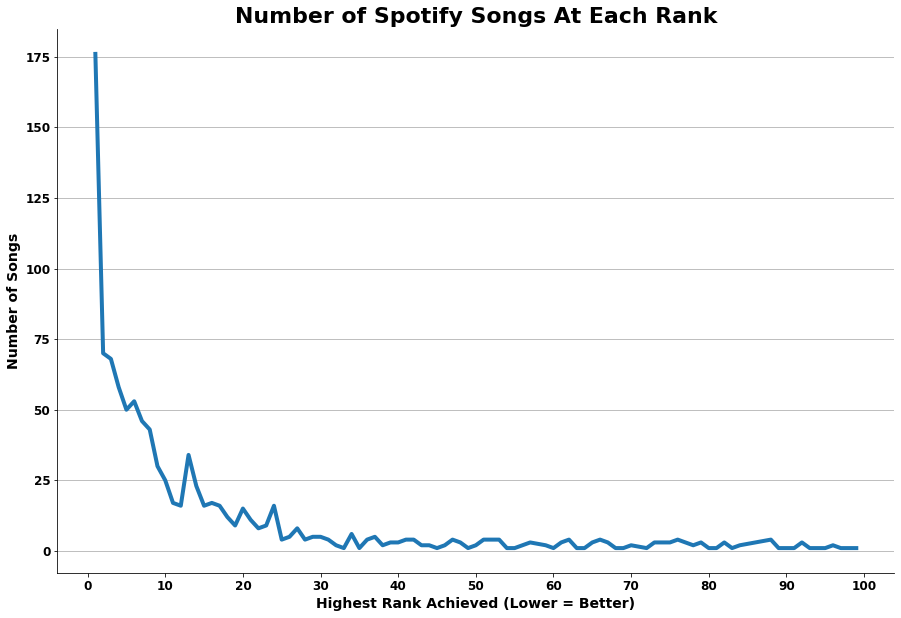

In [6]:
plt.figure(figsize = (15,10))
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.plot(df_3['rank'], df_3['song'], linewidth = 4)
plt.grid(axis = 'y')
plt.xlabel('Highest Rank Achieved (Lower = Better)', fontweight = 'bold', fontsize = 14)
plt.xticks(x_ticks, fontweight = 'bold', fontsize = 12)
plt.ylabel('Number of Songs', fontweight = 'bold', fontsize = 14)
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.title('Number of Spotify Songs At Each Rank', fontweight = 'bold', fontsize = 22)
sns.despine()
plt.show()

## What Tempo Are The Most Popular Songs Played At?:

In [7]:
df_4 = combined[['artist_spotify', 'explicit', 'tempo', 'energy', 'danceability', 'speechiness', 'acousticness', 'liveness', 'valence', 'rank']]
df_5 = df_4.groupby(['artist_spotify', 'explicit', 'tempo', 'energy', 'danceability', 'speechiness', 'acousticness', 'liveness', 'valence'])['rank'].min().reset_index()

In [8]:
cond_1 = (df_5['rank'] == 1) | (df_5['rank'] == 2) | (df_5['rank'] == 3) | (df_5['rank'] == 4) | (df_5['rank'] == 5) | (df_5['rank'] == 6) | (df_5['rank'] == 7) | (df_5['rank'] == 8) | (df_5['rank'] == 9) | (df_5['rank'] == 10)
cond_2 = (df_5['rank'] == 11) | (df_5['rank'] == 12) | (df_5['rank'] == 13) | (df_5['rank'] == 14) | (df_5['rank'] == 15) | (df_5['rank'] == 16) | (df_5['rank'] == 17) | (df_5['rank'] == 18) | (df_5['rank'] == 19) | (df_5['rank'] == 20)
cond_3 = (df_5['rank'] == 21) | (df_5['rank'] == 22) | (df_5['rank'] == 23) | (df_5['rank'] == 24) | (df_5['rank'] == 25) | (df_5['rank'] == 26) | (df_5['rank'] == 27) | (df_5['rank'] == 28) | (df_5['rank'] == 29) | (df_5['rank'] == 30)
cond_4 = (df_5['rank'] == 31) | (df_5['rank'] == 32) | (df_5['rank'] == 33) | (df_5['rank'] == 34) | (df_5['rank'] == 35) | (df_5['rank'] == 36) | (df_5['rank'] == 37) | (df_5['rank'] == 38) | (df_5['rank'] == 39) | (df_5['rank'] == 40)
cond_5 = (df_5['rank'] == 41) | (df_5['rank'] == 42) | (df_5['rank'] == 43) | (df_5['rank'] == 44) | (df_5['rank'] == 45) | (df_5['rank'] == 46) | (df_5['rank'] == 47) | (df_5['rank'] == 48) | (df_5['rank'] == 49) | (df_5['rank'] == 50)
cond_6 = (df_5['rank'] == 51) | (df_5['rank'] == 52) | (df_5['rank'] == 53) | (df_5['rank'] == 54) | (df_5['rank'] == 55) | (df_5['rank'] == 56) | (df_5['rank'] == 57) | (df_5['rank'] == 58) | (df_5['rank'] == 59) | (df_5['rank'] == 60)
cond_7 = (df_5['rank'] == 61) | (df_5['rank'] == 62) | (df_5['rank'] == 63) | (df_5['rank'] == 64) | (df_5['rank'] == 65) | (df_5['rank'] == 66) | (df_5['rank'] == 67) | (df_5['rank'] == 68) | (df_5['rank'] == 69) | (df_5['rank'] == 70)
cond_8 = (df_5['rank'] == 71) | (df_5['rank'] == 72) | (df_5['rank'] == 73) | (df_5['rank'] == 74) | (df_5['rank'] == 75) | (df_5['rank'] == 76) | (df_5['rank'] == 77) | (df_5['rank'] == 78) | (df_5['rank'] == 79) | (df_5['rank'] == 80)
cond_9 = (df_5['rank'] == 81) | (df_5['rank'] == 82) | (df_5['rank'] == 83) | (df_5['rank'] == 84) | (df_5['rank'] == 85) | (df_5['rank'] == 86) | (df_5['rank'] == 87) | (df_5['rank'] == 88) | (df_5['rank'] == 89) | (df_5['rank'] == 90)
cond_10 = (df_5['rank'] == 91) | (df_5['rank'] == 92) | (df_5['rank'] == 93) | (df_5['rank'] == 94) | (df_5['rank'] == 95) | (df_5['rank'] == 96) | (df_5['rank'] == 97) | (df_5['rank'] == 98) | (df_5['rank'] == 99) | (df_5['rank'] == 100)

df_5.loc[cond_1, 'rank'] = '1-10'
df_5.loc[cond_2, 'rank'] = '11-20'
df_5.loc[cond_3, 'rank'] = '21-30'
df_5.loc[cond_4, 'rank'] = '31-40'
df_5.loc[cond_5, 'rank'] = '41-50'
df_5.loc[cond_6, 'rank'] = '51-60'
df_5.loc[cond_7, 'rank'] = '61-70'
df_5.loc[cond_8, 'rank'] = '71-80'
df_5.loc[cond_9, 'rank'] = '81-90'
df_5.loc[cond_10, 'rank'] = '91-100'

In [9]:
df_6 = df_5.groupby('rank')['tempo'].mean().reset_index()
df_7 = df_5.groupby('rank')['energy'].mean().reset_index()
df_8 = df_5.groupby('rank')['danceability'].mean().reset_index()
df_9 = df_5.groupby('rank')['acousticness'].mean().reset_index()
df_10 = df_5.groupby('rank')['valence'].mean().reset_index()

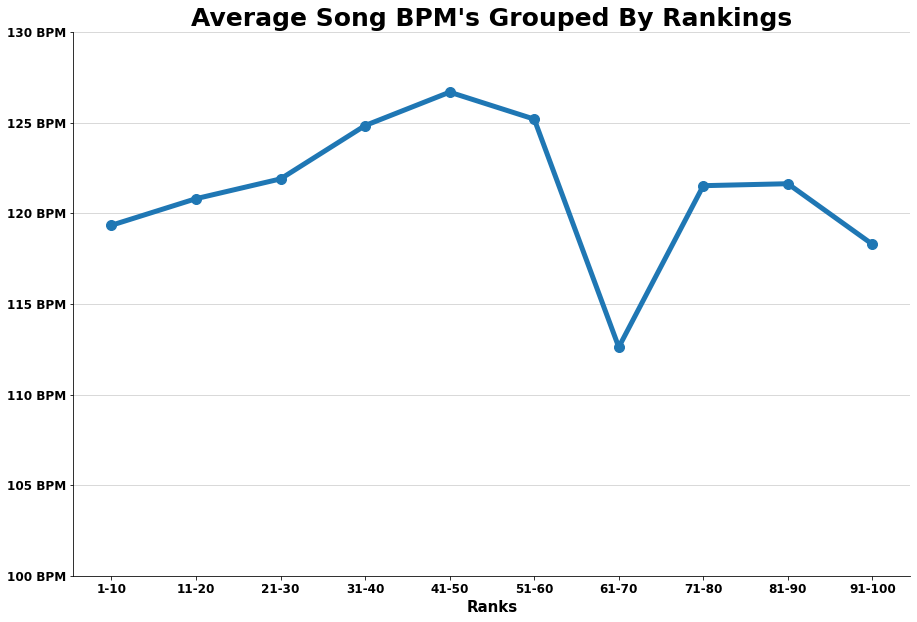

In [10]:
plt.figure(figsize = (15,10))

plt.plot(df_6['rank'], df_6['tempo'], linewidth = 5, marker = 'o', markersize = 10)
plt.yticks([100, 105, 110, 115, 120, 125, 130], labels = ['100 BPM', '105 BPM', '110 BPM', '115 BPM', '120 BPM', '125 BPM', '130 BPM'],
          fontweight = 'bold', fontsize = 12)
plt.xlabel('Ranks', fontweight = 'bold', fontsize = 15)
plt.xticks(fontweight = 'bold', fontsize = 12)
plt.title("Average Song BPM's Grouped By Rankings", fontweight = 'bold', fontsize = 25)
plt.grid(axis = 'y', alpha = 0.6)

sns.despine()
plt.show()

## Common Characteristics Among Songs:

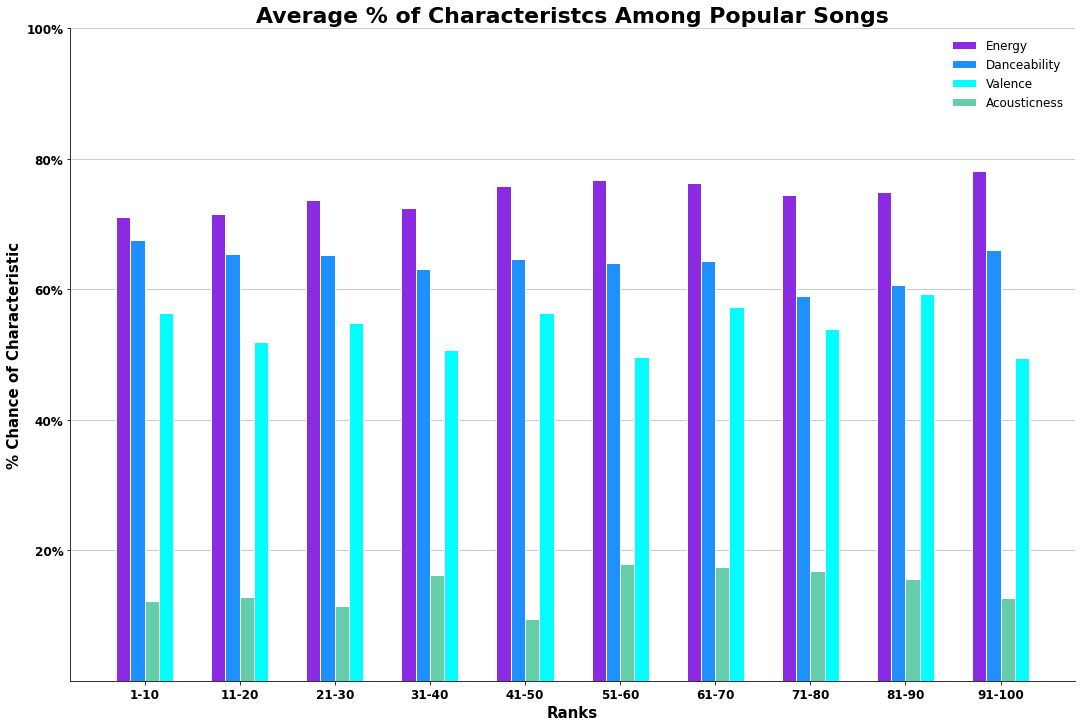

In [11]:
plt.figure(figsize = (18,12))
x = np.arange(10)
barwidth = 0.15

plt.bar(x - (barwidth*1.5), df_7['energy'], width = barwidth, label = 'Energy', color = 'blueviolet', 
        edgecolor = 'white', zorder = 2)
plt.bar(x - (barwidth*0.5), df_8['danceability'], width = barwidth, label = 'Danceability', color = 'DodgerBlue', 
        edgecolor = 'white', zorder = 2)
plt.bar(x + (barwidth*1.5), df_10['valence'], width = barwidth, label = 'Valence', color = 'cyan', 
        edgecolor = 'white', zorder = 2)
plt.bar(x + (barwidth*0.5), df_9['acousticness'], width = barwidth, label = 'Acousticness', 
        color = 'mediumaquamarine', edgecolor = 'white', zorder = 2)

plt.xlabel('Ranks', fontweight = 'bold', fontsize = 15)
plt.xticks([0,1,2,3,4,5,6,7,8,9], 
           labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'], 
           fontweight = 'bold', fontsize = 12)
plt.ylabel('% Chance of Characteristic', fontweight = 'bold', fontsize = 15)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1], labels = ['20%', '40%', '60%', '80%', '100%'],
          fontweight = 'bold', fontsize = 12)
plt.title('Average % of Characteristcs Among Popular Songs', fontweight = 'bold', fontsize = 22)

plt.grid(axis = 'y', alpha = 0.8)
plt.legend(frameon = False, fontsize = 12)

sns.despine()
plt.show()

## Clean vs. Explicit Songs:

In [12]:
df_11 = df_5.groupby('rank')['explicit'].value_counts()
print(df_11)

rank    explicit
1-10    False       449
        True        199
11-20   False       129
        True         53
21-30   False        61
        True         17
31-40   False        29
        True          2
41-50   False        17
        True          8
51-60   False        11
        True         11
61-70   False        16
        True          7
71-80   False        19
        True          2
81-90   False        14
        True          2
91-100  False        10
        True          1
Name: explicit, dtype: int64


In [13]:
df_12 = df_5.groupby('rank')['explicit'].value_counts(normalize = True)
df_12

rank    explicit
1-10    False       0.692901
        True        0.307099
11-20   False       0.708791
        True        0.291209
21-30   False       0.782051
        True        0.217949
31-40   False       0.935484
        True        0.064516
41-50   False       0.680000
        True        0.320000
51-60   False       0.500000
        True        0.500000
61-70   False       0.695652
        True        0.304348
71-80   False       0.904762
        True        0.095238
81-90   False       0.875000
        True        0.125000
91-100  False       0.909091
        True        0.090909
Name: explicit, dtype: float64

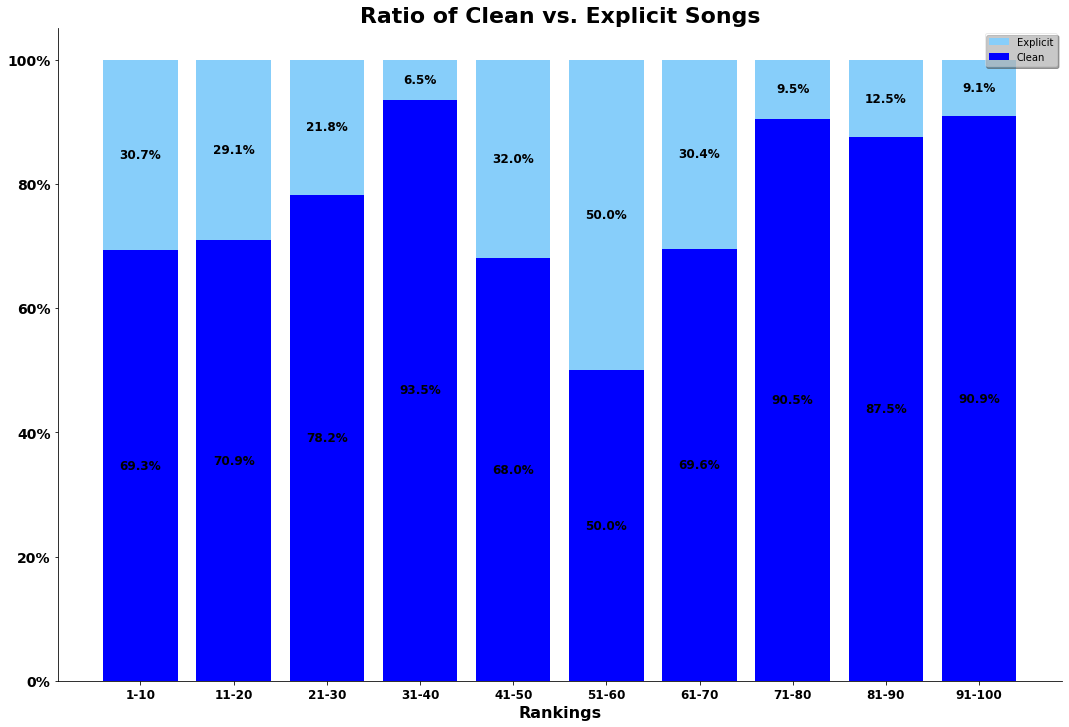

In [14]:
ranks = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
explicit_false = [0.692901, 0.708791, 0.782051, 0.935484, 0.680000, 0.500000, 0.695652, 0.904762, 0.875000, 0.909091]
explicit_true = [0.307099, 0.291209, 0.217949, 0.064516, 0.320000, 0.500000, 0.304348, 0.095238, 0.125000, 0.090909]

plt.figure(figsize = (18,12))
plt.bar(ranks, explicit_true, label = 'Explicit', bottom = explicit_false, color = 'LightSkyBlue')
plt.bar(ranks, explicit_false, label = 'Clean', color = 'Blue')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['0%', '20%', '40%', '60%', '80%', '100%'],
          fontweight = 'bold', fontsize = 14)
plt.xlabel('Rankings', fontweight = 'bold', fontsize = 16)
plt.xticks(fontweight = 'bold', fontsize = 12)
plt.title('Ratio of Clean vs. Explicit Songs', fontweight = 'bold', fontsize = 22)

for i in range(len(ranks)):
    plt.text(i, (explicit_true[i]/2) + explicit_false[i], str(round(explicit_true[i] * 100, 1)) + '%', 
             ha = 'center', va = 'center', fontweight = 'bold', fontsize = 12)

for i in range(len(ranks)):
    plt.text(i, explicit_false[i]/2, str(round(explicit_false[i] * 100, 1)) + '%', ha = 'center', va = 'center', 
             fontweight = 'bold', fontsize = 12)
    

plt.legend(framealpha = 0.4, shadow = True)
sns.despine()
plt.show()